In [19]:
import pybamm as pb;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
import scipy.optimize
import random;import time, signal
fs=17;
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip\Rio_Code\Fun_P2"))
sys.path.append(str_path_1) 
from Fun_P2_Patrick import *

In [21]:
# define global index and dict for all experiment data - prepare for read!
Exp_Path = [
    "Expt 1 - Si-based Degradation/",
    "Expt 2,2 - C-based Degradation 2/",
    "Expt 3 - Cathode Degradation and Li-Plating/",
    "Expt 4 - Drive Cycle Aging (Control)/",
    "Expt 5 - Standard Cycle Aging (Control)/",]
Exp_head = [
    "Expt 1",
    "Expt 2,2",
    "Expt 3",
    "Expt 4",
    "Expt 5",]
Exp_1_Cell = ["A","B","J","D","E","F","K","L","M"];
Exp_1_Temp = {
    "A":"10","B":"10","J":"10",
    "D":"25","E":"25","F":"25",
    "K":"40","L":"40","M":"40",}
Temp_Cell_Exp_1 = {
    "10":["A","B","J"],
    "25":["D","E","F"],
    "40":["K","L","M"],}
Exp_2_Cell = ["A","B","C","D","E","F"];
Exp_2_Temp = {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",}
Temp_Cell_Exp_2 = {
    "10":["A","B"],
    "25":["C","D"],
    "40":["E","F"],}
Exp_3_Cell = ["A","B","C","D","E","F","G","H","I"];
Exp_3_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25","F":"25",
    "G":"40","H":"40","I":"40"}
Temp_Cell_Exp_3 = {
    "10":["A","B","C"],
    "25":["D","E","F"],
    "40":["G","H","I"],}
Exp_4_Cell = ["A","B","C","D","E","F","G","H"];
Exp_4_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_4 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_5_Cell = ["A","B","C","D","E","F","G","H"];
Exp_5_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_5 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_All_Cell  = [Exp_1_Cell,Exp_2_Cell,Exp_3_Cell,Exp_4_Cell,Exp_5_Cell]
Exp_Temp_Cell = [Exp_1_Temp,Exp_2_Temp,Exp_3_Temp,Exp_4_Temp,Exp_5_Temp]
Temp_Cell_Exp_All = [Temp_Cell_Exp_1,Temp_Cell_Exp_2,Temp_Cell_Exp_3,Temp_Cell_Exp_4,Temp_Cell_Exp_5]
Mark_Cell_All = [
    {
    "A":"o","B":">","J":"v",
    "D":"o","E":">","F":"v",
    "K":"o","L":">","M":"v",},
    {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">","F":"v",
    "G":"o","H":">","I":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",}]
Color_Cell_All = [
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"J":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "K":[1,0,0,0.4],"L":[1,0,0,0.4],"M":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"C":[0, 0, 0,0.7],
    "E":[1,0,0,0.4],"F":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "G":[1,0,0,0.4],"H":[1,0,0,0.4],"I":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],}]


In [22]:
# Function to read exp
def Read_Exp(BasicPath,Exp_Any_Cell,Exp_Path,Exp_head,Exp_Any_Temp,i):
    Exp_Any_AllData  = {}
    for cell in Exp_Any_Cell:
        Exp_Any_AllData[cell] = {} # one cell
        # For extracted directly measured capacity, resistance, etc.
        Exp_Any_AllData[cell]["Extract Data"] = pd.read_csv(
            BasicPath+Exp_Path[i]+
            f"{Exp_head[i]} - cell {cell} ({Exp_Any_Temp[cell]}degC) - Extracted Data.csv", 
            index_col=0)
        # Read for DMA results, further a dictionary
        Exp_Any_AllData[cell]["DMA"] = {}
        Exp_Any_AllData[cell]["DMA"]["Cap_Offset"]=pd.read_csv(
            BasicPath+Exp_Path[i]+ "DMA Output/" + f"cell {cell}/" + 
            f"{Exp_head[i]} - Capacity and offset data from OCV-fitting for cell {cell}.csv", 
            index_col=0)
        Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]=pd.read_csv(
            BasicPath+Exp_Path[i]+ "DMA Output/" + f"cell {cell}/" + 
            f"{Exp_head[i]} - DM data from OCV-fitting for cell {cell}.csv", 
            index_col=0)
        Exp_Any_AllData[cell]["DMA"]["Fit_SOC"]=pd.read_csv(
            BasicPath+Exp_Path[i]+ "DMA Output/" + f"cell {cell}/" + 
            f"{Exp_head[i]} - fitting parameters from OCV-fitting for cell {cell}.csv", 
            index_col=0)
        Exp_Any_AllData[cell]["DMA"]["RMSE"]=pd.read_csv(
            BasicPath+Exp_Path[i]+ "DMA Output/" + f"cell {cell}/" + 
            f"{Exp_head[i]} - RMSE data from OCV-fitting for cell {cell}.csv", 
            index_col=0)
    return Exp_Any_AllData
# Plot summary 
# str_x can be Ageing Cycles; Charge Throughput (A.h) and Days of degradation
def Plot_Exp_Summary(
        Exp_Any_AllData,Exp_Any_Cell,exp_Path,Addstr,
        Marker,Color,Exp_1_Temp,str_x,
        BasicPath_Save, save=True,dpi=300,):
    fig_DMA_output, ax = plt.subplots(4,2, sharex=True, figsize=(16,12),)
    for cell in Exp_Any_Cell:
        ax[0,0].plot(
            Exp_Any_AllData[cell]["Extract Data"][str_x],
            #np.array(Exp_Any_AllData[cell]["Extract Data"]["Charge Throughput (A.h)"])/1e3,
            Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]["SoH"],
            color=Color[cell],marker=Marker[cell],
            label=f"Cell {cell},{Exp_1_Temp[cell]}"+r"$^\circ$C") 
        ax[1,0].plot(
            Exp_Any_AllData[cell]["Extract Data"][str_x],
            #np.array(Exp_Any_AllData[cell]["Extract Data"]["Charge Throughput (A.h)"])/1e3,
            Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]["LAM PE"],
            color=Color[cell],marker=Marker[cell])
        ax[2,0].plot(
            Exp_Any_AllData[cell]["Extract Data"][str_x],
            #np.array(Exp_Any_AllData[cell]["Extract Data"]["Charge Throughput (A.h)"])/1e3,
            Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]["LAM NE_tot"],
            color=Color[cell],marker=Marker[cell])
        ax[3,0].plot(
            Exp_Any_AllData[cell]["Extract Data"][str_x],
            #np.array(Exp_Any_AllData[cell]["Extract Data"]["Charge Throughput (A.h)"])/1e3,
            Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]["LLI"],
            color=Color[cell],marker=Marker[cell])  
        ax[0,1].plot(
            Exp_Any_AllData[cell]["Extract Data"][str_x],
            #np.array(Exp_Any_AllData[cell]["Extract Data"]["Charge Throughput (A.h)"])/1e3,
            Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]["LAM NE_Gr"],
            color=Color[cell],marker=Marker[cell],
            label=f"Cell {cell},{Exp_1_Temp[cell]}"+r"$^\circ$C")
        ax[1,1].plot(
            Exp_Any_AllData[cell]["Extract Data"][str_x],
            #np.array(Exp_Any_AllData[cell]["Extract Data"]["Charge Throughput (A.h)"])/1e3,
            Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]["LAM NE_Si"],
            color=Color[cell],marker=Marker[cell])
        ax[2,1].plot(
            Exp_Any_AllData[cell]["Extract Data"][str_x],
            #np.array(Exp_Any_AllData[cell]["Extract Data"]["Charge Throughput (A.h)"])/1e3,
            np.array(Exp_Any_AllData[cell]["DMA"]["Cap_Offset"]["Offset"])/1e3,
            color=Color[cell],marker=Marker[cell],
            label=f"Cell {cell},{Exp_1_Temp[cell]}"+r"$^\circ$C")
        ax[3,1].plot(
            Exp_Any_AllData[cell]["Extract Data"][str_x],
            #np.array(Exp_Any_AllData[cell]["Extract Data"]["Charge Throughput (A.h)"])/1e3,
            np.array(Exp_Any_AllData[cell]["DMA"]["RMSE"]["RMSE (V)"])*1e3,
            color=Color[cell],marker=Marker[cell])
    ax[0,0].set_ylabel('SOH')
    ax[1,0].set_ylabel('LAM PE')
    ax[2,0].set_ylabel('LAM NE_tot')
    ax[3,0].set_ylabel('LLI')
    ax[0,1].set_ylabel('LAM NE_Gr')
    ax[1,1].set_ylabel('LAM NE_Si')
    ax[2,1].set_ylabel('Offset (Ah)')
    ax[3,1].set_ylabel('RMSE (mV)')
    ax[3,0].set_xlabel(str_x)
    ax[3,1].set_xlabel(str_x)
    #ax[3,1].set_xticks(np.arange(0, 12,2));
    #ax[3,0].set_xticks(np.arange(0, 12,2));
    for i in range(4):
        for j in range(2):
            ax[i,j].grid()
    box = ax[0,1].get_position()
    ax[0,1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[2,1].legend(prop={'family':'DejaVu Sans','size':fs-8},
        loc='center left',bbox_to_anchor=(1, 0.5),ncol=1,
        frameon=False,markerscale=1,borderpad=0.2,
        handlelength=1.5,columnspacing=1)
    fig_DMA_output.suptitle(f'{exp_Path[0:6]} Summary'+Addstr, fontsize=fs+3)
    fig_DMA_output.tight_layout()
    # BasicPath_Save
    if save == True:
        plt.savefig(BasicPath_Save+ f'{exp_Path[0:6]} Summary'+Addstr+'.png', dpi=dpi)
    return

In [23]:
BasicPath_Save = "D:/OneDrive - Imperial College London/SimDataSave/DMA_Niall_Ruihe/vs_Days/"
# Global path 
BasicPath = "D:/OneDrive - Imperial College London/SimDataSave/InputData/"
index_exp = 1  # index for experiment set, range from 1~5
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] # select a cell list through temperature
Exp_Any_AllData = Read_Exp(
    BasicPath,Exp_All_Cell[index_exp-1],Exp_Path,Exp_head,Exp_Temp_Cell[index_exp-1],index_exp-1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


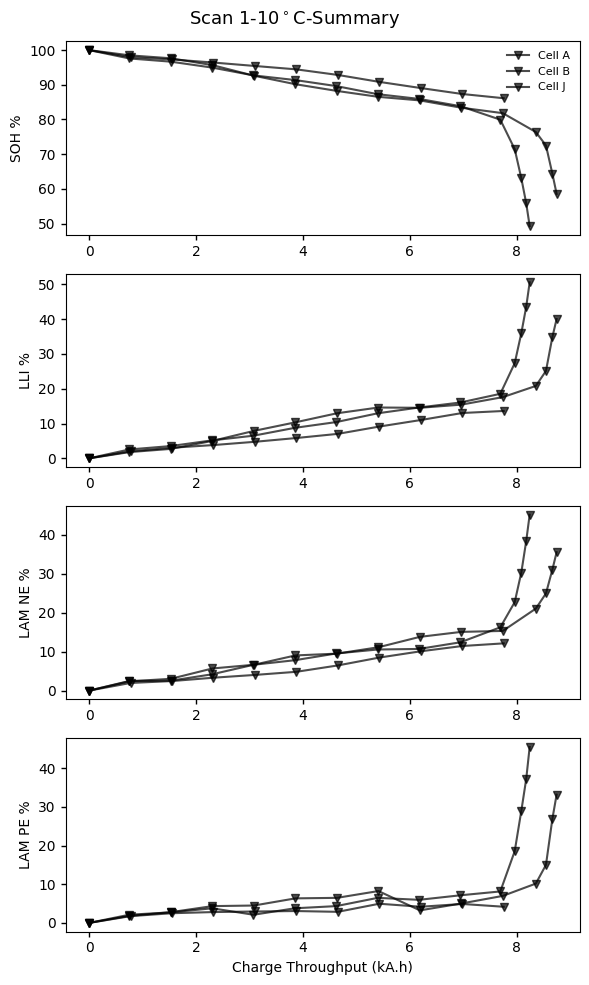

In [55]:
Temper_i = 10 + 273.15; fs=10; dpi=300
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)
Plot_Cyc_RPT_4(
        _,
        Exp_Any_AllData,Temp_Cell_Exp,   # need to be specific for one expeirment
        1,
        Temper_i,_,_, _,fs,dpi)

In [ ]:
# read and plot:
i=0
Marker = {
    "A":"o","B":">","J":"v",
    "D":"o","E":">","F":"v",
    "K":"o","L":">","M":"v",}
Color = {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"J":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "K":[1,0,0,0.4],"L":[1,0,0,0.4],"M":[1,0,0,0.4],}
str_x = 'Ageing Cycles'
Exp_1_AllData = Read_Exp(Exp_All_Cell[i],Exp_Path,Exp_head,Exp_Temp_Cell[i],i)
Exp_1_AllData = Read_Exp(Exp_All_Cell[i],Exp_Path,Exp_head,Exp_Temp_Cell[i],i)
exp_Path = Exp_Path[0] # for exp-1
Plot_Exp_Summary(Exp_1_AllData,Exp_All_Cell[i],exp_Path,"",
    Marker,Color,Exp_Temp_Cell[i],str_x,BasicPath_Save,save=False,dpi=300)
Plot_Exp_Summary(Exp_1_AllData,["A","B","J"],exp_Path," 10degC",
    Marker,Color,Exp_Temp_Cell[i],str_x,BasicPath_Save,save=False,dpi=300)
Plot_Exp_Summary(Exp_1_AllData,["D","E","F"],exp_Path," 25degC",
    Marker,Color,Exp_Temp_Cell[i],str_x,BasicPath_Save,save=False,dpi=300)
Plot_Exp_Summary(Exp_1_AllData,["K","L","M"],exp_Path," 40degC",
    Marker,Color,Exp_Temp_Cell[i],str_x,BasicPath_Save,save=False,dpi=300)

In [53]:
# plot inside the function:
def Plot_Cyc_RPT_4(
        my_dict_RPT,
        Exp_Any_AllData,Temp_Cell_Exp,   # need to be specific for one expeirment
        Scan_i,
        Temper_i,model_options,BasicPath, Target,fs,dpi):
    Num_subplot = 5;
    fig, axs = plt.subplots(Num_subplot,1, figsize=(6,13),tight_layout=True)
    axs[0].plot(
        my_dict_RPT['CDend Throughput capacity [kA.h]'], 
        my_dict_RPT['CDend SOH [%]'],     
        '-o', label="Scan=" + str(Scan_i) )
    # Plot Charge Throughput (A.h) vs SOH
    color_exp = [0, 0, 0,0.7]; marker_exp = "v";
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(Temper_i- 273.15))]
    for cell in Exp_temp_i_cell:
        axs[0].plot(
            np.array(Exp_Any_AllData[cell]["Extract Data"]["Charge Throughput (A.h)"])/1e3,
            np.array(Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]["SoH"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}") 
        axs[1].plot(
            np.array(Exp_Any_AllData[cell]["Extract Data"]["Charge Throughput (A.h)"])/1e3,
            np.array(Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]["LLI"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}")  
        axs[2].plot(
            np.array(Exp_Any_AllData[cell]["Extract Data"]["Charge Throughput (A.h)"])/1e3,
            np.array(Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp, )
        axs[3].plot(
            np.array(Exp_Any_AllData[cell]["Extract Data"]["Charge Throughput (A.h)"])/1e3,
            np.array(Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]["LAM PE"])*100,
            color=color_exp,marker=marker_exp,)
    if model_options.__contains__("lithium plating"):
        axs[1].plot(
            my_dict_RPT['CDend Throughput capacity [kA.h]'], 
            my_dict_RPT["CDend LLI lithium plating [%]"],'--o', label="LiP")
    if model_options.__contains__("SEI"):
        axs[1].plot(
            my_dict_RPT['CDend Throughput capacity [kA.h]'], 
            my_dict_RPT["CDend LLI SEI [%]"] ,'--o', label="SEI")
    if model_options.__contains__("SEI on cracks"):
        axs[1].plot(
            my_dict_RPT['CDend Throughput capacity [kA.h]'], 
            my_dict_RPT["CDend LLI SEI on cracks [%]"] ,'--o', label="SEI-on-cracks")
    axs[2].plot(
        my_dict_RPT["CDend Throughput capacity [kA.h]"], 
        my_dict_RPT["CDend LAM_ne [%]"],     '-o', ) 
    axs[3].plot(
        my_dict_RPT["CDend Throughput capacity [kA.h]"], 
        my_dict_RPT["CDend LAM_pe [%]"],     '-o',  ) 
    axs[4].plot(
        my_dict_RPT["CDend Throughput capacity [kA.h]"], 
        (my_dict_RPT["CDend Local ECM resistance [Ohm]"])*1e3,     '-o', ) 
    axs[3].set_xlabel("Charge Throughput (kA.h)")
    axs[0].set_ylabel("SOH %")
    axs[1].set_ylabel("LLI %")
    axs[2].set_ylabel("LAM NE %")
    axs[3].set_ylabel("LAM PE %")
    axs[4].set_ylabel(r"Lump resistance [m$\Omega$]")
    for i in range(0,Num_subplot):
        labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); [label.set_fontname('DejaVu Sans') for label in labels]
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
    axs[0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    axs[1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    fig.suptitle(
        f"Scan {str(Scan_i)}-{str(int(Temper_i- 273.15))}"+r"$^\circ$C - Summary", fontsize=fs+3)

    plt.savefig(BasicPath + Target+ str(Scan_i)+f"/{str(int(Temper_i- 273.15))}"+r"$^\circ$C - Cap-LLI.png", dpi=dpi)

    if model_options.__contains__("SEI on cracks"):
        fs=17;Num_subplot = 2;
        fig, axs = plt.subplots(1,Num_subplot, figsize=(12,4.8),tight_layout=True)
        axs[0].plot(my_dict_RPT['CDend Throughput capacity [kA.h]'], my_dict_RPT["CDend X-averaged total SEI on cracks thickness [m]"],     '-o', label="Scan=" + str(Scan_i) )
        axs[1].plot(my_dict_RPT['CDend Throughput capacity [kA.h]'], my_dict_RPT["CDend X-averaged negative electrode roughness ratio"],'-o', label="Scan=" + str(Scan_i) )
        axs[0].set_ylabel("SEI on cracks thickness [m]",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[1].set_ylabel("Roughness ratio",   fontdict={'family':'DejaVu Sans','size':fs})
        for i in range(0,Num_subplot):
            axs[i].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
            labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); [label.set_fontname('DejaVu Sans') for label in labels]
            axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
            axs[i].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
        axs[0].set_title("X-avg tot Neg SEI on cracks thickness",   fontdict={'family':'DejaVu Sans','size':fs+1})
        axs[1].set_title("X-avg Neg roughness ratio",   fontdict={'family':'DejaVu Sans','size':fs+1})
        plt.savefig(BasicPath + Target+ str(Scan_i)+f"/{str(int(Temper_i- 273.15))}"+r"$^\circ$C - Cracks related.png", dpi=dpi)

        Num_subplot = 2;
        fig, axs = plt.subplots(1,Num_subplot, figsize=(12,4.8),tight_layout=True)
        axs[1].plot(my_dict_RPT['CDend Throughput capacity [kA.h]'], 
            my_dict_RPT["CDend Negative electrode capacity [A.h]"][0]
            -
            my_dict_RPT["CDend Negative electrode capacity [A.h]"],'-o',label="Neg Scan=" + str(Scan_i))
        axs[1].plot(my_dict_RPT['CDend Throughput capacity [kA.h]'], 
            my_dict_RPT["CDend Positive electrode capacity [A.h]"][0]
            -
            my_dict_RPT["CDend Positive electrode capacity [A.h]"],'-^',label="Pos Scan=" + str(Scan_i))
        axs[0].plot(
            my_dict_RPT['CDend Throughput capacity [kA.h]'], 
            my_dict_RPT["CDend X-averaged total SEI on cracks thickness [m]"],                  
            '-o',label="Scan="+ str(Scan_i))
        for i in range(0,1):
            axs[i].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
            labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); [label.set_fontname('DejaVu Sans') for label in labels]
            axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
            axs[i].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
        axs[0].set_ylabel("SEI on cracks thickness [m]",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[0].set_title("CDend X-avg tot SEI on cracks thickness",   fontdict={'family':'DejaVu Sans','size':fs+1})
        for i in range(1,2):
            axs[i].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
            axs[i].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
            labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); [label.set_fontname('DejaVu Sans') for label in labels]
            axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
            axs[i].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
        axs[1].set_title("LAM of Neg and Pos",   fontdict={'family':'DejaVu Sans','size':fs+1})
        plt.savefig(BasicPath + Target+ str(Scan_i)+"/LAM-IR.png", dpi=dpi)

    Num_subplot = 2;
    fig, axs = plt.subplots(1,Num_subplot, figsize=(12,4.8),tight_layout=True)
    axs[0].plot(my_dict_RPT['CDend Throughput capacity [kA.h]'], my_dict_RPT["CDsta Positive electrode stoichiometry"] ,'-o',label="Start" )
    axs[0].plot(my_dict_RPT['CDend Throughput capacity [kA.h]'], my_dict_RPT["CDend Positive electrode stoichiometry"] ,'-^',label="End" )
    axs[1].plot(my_dict_RPT['CDend Throughput capacity [kA.h]'], my_dict_RPT["CDsta Negative electrode stoichiometry"],'-o',label="Start" )
    axs[1].plot(my_dict_RPT['CDend Throughput capacity [kA.h]'], my_dict_RPT["CDend Negative electrode stoichiometry"],'-^',label="End" )
    for i in range(0,2):
        axs[i].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[i].set_ylabel("SOC",   fontdict={'family':'DejaVu Sans','size':fs})
        labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); [label.set_fontname('DejaVu Sans') for label in labels]
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
        axs[i].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)     
    axs[0].set_title("Neg SOC range (Dis)",   fontdict={'family':'DejaVu Sans','size':fs+1})
    axs[1].set_title("Pos SOC range (Dis)",   fontdict={'family':'DejaVu Sans','size':fs+1})
    plt.savefig(BasicPath + Target+ str(Scan_i)+"/SOC_RPT_dis.png", dpi=dpi) 

    return

In [ ]:
Marker = {
    "A":"o","B":">","J":"v",
    "D":"o","E":">","F":"v",
    "K":"o","L":">","M":"v",}
Color = {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"J":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "K":[1,0,0,0.4],"L":[1,0,0,0.4],"M":[1,0,0,0.4],}

In [ ]:
########################  Input  ########################
# all values here must be a list, even it is a single object
Para_dict_All = {
   "Total ageing cycles":[100,],
   "Ageing cycles between RPT":[10,],
   "Update cycles for ageing": [10,],
   "Cycles within RPT":[1,],
   "Ageing temperature":[25,],
   "RPT temperature":[25,],
   "Mesh list":[[5,5,5,60,20],],   # Simon uses 30
   #"Exponential mesh stretch":[1.0],
   "Para_Set":[ "OKane2023",], # Li2023_Coupled
   "Model option":[
         {
            "calculate discharge energy":"true",
            "particle": "Fickian diffusion",          
            "SEI":"interstitial-diffusion limited",   
            "SEI on cracks":"true",  
            "SEI film resistance":"distributed",          
            "SEI porosity change":"true",      
            "particle mechanics":("swelling and cracking", "swelling only"), 
            "loss of active material":"stress-driven", 
            "lithium plating":"partially reversible"
         },
         ],
   "Inner SEI reaction proportion":[0.5,],
   "Ratio of lithium moles to SEI moles":[2,], # I have always been using 1 for solvent consumption model
   "Initial inner SEI thickness [m]":[2.5E-9,],
   "Initial outer SEI thickness [m]":[2.5E-9,],
   "SEI growth activation energy [J.mol-1]":[38000,],
   # Solvent consumption sub-model
   "Initial electrolyte excessive amount ratio":[ 0.5], # set to <1 for DryOut=Off 
   "Current solvent concentration in the reservoir [mol.m-3]":[4541.0,],
   "Current electrolyte concentration in the reservoir [mol.m-3]":[1000,],
   "Ratio of Li-ion concentration change in electrolyte consider solvent consumption":[1.0,],
   # DFN parameter
   "Upper voltage cut-off [V]":[4.21,],
   "Lower voltage cut-off [V]":[2.49,],

   # interstitial-diffusion limited
   'Inner SEI lithium interstitial diffusivity [m2.s-1]':[1e-20],    
   'Lithium interstitial reference concentration [mol.m-3]':[15,],
   # ec-reaction limited
   'EC diffusivity [m2.s-1]':[1e-22,],
   'SEI kinetic rate constant [m.s-1]':[1e-12,], 
   'EC initial concentration in electrolyte [mol.m-3]':[4541.0,],
   'Typical EC concentration in electrolyte [mol.m-3]':[4541.0,], # Mark Ruihe change, act as an initial value here
   # LiP and coupling with SEI:
   "Dead lithium decay constant [s-1]":[ 1e-6,],            # default: 1e-6
   'Lithium plating kinetic rate constant [m.s-1]':[1E-10], # default: 1e-9
   # Crack model
   "Negative electrode LAM constant proportional term [s-1]":[ 1e-9], # default: 2.7778e-07
   "Positive electrode LAM constant proportional term [s-1]":[ 1e-9,], # default: 2.7778e-07
   # make it simple for now,], but may want to have T dependency in the future
   "Negative electrode cracking rate":[ 1e-22,],   # default: function, ~3.9e-20
   #"Positive electrode cracking rate":[ 1e-22,],   # default: function, ~3.9e-20
   "Negative electrode volume change":[ 0.0,],
   "Positive electrode volume change":[ 0.0,],
   #"Initial Neg SOC":[0.850],    #list(np.linspace(0.84,0.90,6)),
   #"Initial Pos SOC":[0.2705], # list(np.linspace(0.22,0.27,6)),
}
Para_dict_list = []
recursive_scan(Para_dict_list,Para_dict_All, list(Para_dict_All.keys()), {})
print(f"Total scan case is {len(Para_dict_list)}")

In [ ]:
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P2_R8_FromSimon'; 
#BasicPath=os.getcwd()
Target  = '/Test_0/'
if not os.path.exists(BasicPath + Target):
   os.mkdir(BasicPath + Target);
book_name_xlsx = 'Test_0.xlsx';
sheet_name_xlsx = 'Results';
Path_pack = [BasicPath,Target,book_name_xlsx,sheet_name_xlsx,];

In [ ]:
# define experiments-1 and output keys
V_max = 4.2;        
V_min = 2.5; 
charge_time_mins = 60 * 4.86491/5
exp_AGE_text = [(
    f"Charge at 0.3 C for {charge_time_mins} minutes",
    f"Discharge at 1 C until {V_min} V", 
    ),  ]
# step index for ageing
step_AGE_CD =0;   step_AGE_CC =1;   step_AGE_CV =2;

exp_RPT_text = [ (
    f"Charge at 1C until {V_max} V",  
    f"Hold at {V_max}V until C/100",
    f"Discharge at 0.1C until {V_min} V (5 minute period)",  
    "Rest for 1 hours (5 minute period)",  
    f"Charge at 0.1C until {V_max} V (5 minute period)",
    "Rest for 1 hours (5 minute period)",
    f"Discharge at 1C until {V_min} V",  
    f"Hold at {V_min} V until C/100",
    ) ]
# step index for RPT
step_RPT_CD = 2;  step_RPT_RE =3;   step_RPT_CC = 4;  

exp_text_list = [exp_AGE_text, exp_RPT_text,];
cycle_no = -1; 
exp_index_pack = [cycle_no,step_AGE_CD,step_AGE_CC,step_AGE_CV,
   step_RPT_CD,step_RPT_RE , step_RPT_CC ];

In [ ]:
########################  Output  ########################
keys_loc_RPT = [ # MAY WANT TO SELECT AGEING CYCLE later
    # Default output:
    "x [m]",
    "x_n [m]",
    "x_s [m]",
    "x_p [m]",
    # default: end; 
    "CCend Porosity",
    "CCend Negative electrode interfacial current density [A.m-2]",
    "CCend Electrolyte potential [V]",
    "CCend Electrolyte concentration [mol.m-3]",
    "CCend Negative electrode reaction overpotential [V]",
    "CCend Negative particle surface concentration [mol.m-3]",
    "CCend Negative electrode roughness ratio",
    "CCend Total SEI on cracks thickness [m]",

    "CDend Porosity",
    "CDend Negative electrode interfacial current density [A.m-2]",
    "CDend Electrolyte potential [V]",
    "CDend Electrolyte concentration [mol.m-3]",
    "CDend Negative electrode reaction overpotential [V]",
    "CDend Negative particle surface concentration [mol.m-3]",
    "CDend Negative electrode roughness ratio",
    "CDend Total SEI on cracks thickness [m]",
    "REend Total SEI on cracks thickness [m]",
]
keys_tim_RPT = [
    # default: CD
    "CD Time [h]",
    "CD Terminal voltage [V]",
    "RE Terminal voltage [V]",
]
keys_cyc_RPT = [   # default: CDend
    "Discharge capacity [A.h]",
    "CDend Total lithium capacity in particles [A.h]",
    "CDend Loss of capacity to lithium plating [A.h]",
    "CDend Loss of capacity to SEI [A.h]",
    "CDend Loss of capacity to SEI on cracks [A.h]",
    "CDend X-averaged total SEI on cracks thickness [m]",
    "CDend X-averaged negative electrode roughness ratio",
    "CDend Local ECM resistance [Ohm]",
    "CDsta Negative electrode stoichiometry", 
    "CDend Negative electrode stoichiometry",
    "CDsta Positive electrode stoichiometry", 
    "CDend Positive electrode stoichiometry",
    "CDend Negative electrode capacity [A.h]",
    "CDend Positive electrode capacity [A.h]",
    "CDend Throughput capacity [A.h]",
    
    #"CDend LAM_ne [%]", # calculate ourselves
    #"CDend LAM_pe [%]",
    #'CDend LLI [%]', 
    #'CDend SOH [%]', 
]

keys_loc_AGE = [ # MAY WANT TO SELECT AGEING CYCLE later
    # Default output:
    "x [m]",
    "x_n [m]",
    "x_s [m]",
    "x_p [m]",
    # default: end; 
    "CCend Porosity",
    "CCend Negative electrode interfacial current density [A.m-2]",
    "CCend Electrolyte potential [V]",
    "CCend Electrolyte concentration [mol.m-3]",
    "CCend Negative electrode reaction overpotential [V]",
    "CCend Negative particle surface concentration [mol.m-3]",
    "CCend Negative electrode roughness ratio",
    "CCend Total SEI on cracks thickness [m]",

    "CDend Porosity",
    "CDend Negative electrode interfacial current density [A.m-2]",
    "CDend Electrolyte potential [V]",
    "CDend Electrolyte concentration [mol.m-3]",
    "CDend Negative electrode reaction overpotential [V]",
    "CDend Negative particle surface concentration [mol.m-3]",
    "CDend Negative electrode roughness ratio",
    "CDend Total SEI on cracks thickness [m]",
    "CDend Electrolyte diffusivity [m2.s-1]",
    "CDend Electrolyte conductivity [S.m-1]",
]
keys_tim_AGE = [];
keys_cyc_AGE = [];
keys_all_RPT = [keys_loc_RPT,keys_tim_RPT,keys_cyc_RPT];
keys_all_AGE = [keys_loc_AGE,keys_tim_AGE,keys_cyc_AGE];
keys_all = [keys_all_RPT,keys_all_AGE];

# Write para - 1st round:
head_list = list(Para_dict_list[0].keys())
head_list.insert(0,"Index");
head_list.insert(1,"Dry out");
head_list.extend([ "exp_AGE_text", "exp_RPT_text",
   "Cap Loss","LLI to LiP",
   "LLI to SEI","LLI to sei-on-cracks",
   "LAM to Neg","LAM to Pos",
   "Vol_Elely_Tot Final", "Vol_Elely_JR Final","Width Final","Error"])
Values_1 = [head_list,];
index_list = np.arange(1,len(Para_dict_list)+1,1)
for Scan_i,Para_dict_i in zip(index_list,Para_dict_list):
    value_list_temp = list(Para_dict_i.values())
    values = []
    for value_list_temp_i in value_list_temp:
        values.append(str(value_list_temp_i))
    values.insert(0,str(Scan_i))
    Values_1.append(values)
write_excel_xlsx(
    BasicPath + Target+book_name_xlsx, 
    sheet_name_xlsx, Values_1)   

Niall_data = loadmat( str_path_1+'\Extracted_all_cell.mat')



In [ ]:
# scan:
index_list = np.arange(1,len(Para_dict_list)+1,1)
for index_i, Para_dict_i in zip(index_list,Para_dict_list):
    Run_P2_Opt_Timeout(
        index_i    ,    Para_dict_i,   Path_pack,
        keys_all,   exp_text_list, exp_index_pack,Niall_data,
        True,False,
    ) 
""" 
if __name__ == "__main__":
    pool = multiprocessing.Pool(8)
    processes = [pool.apply_async(
        Run_P2_Opt_Timeout, 
        args=(
            index_i, Para_dict_i,   Path_pack,
            keys_all,   exp_text_list, exp_index_pack,Niall_data,False,False,
        )
            ) 
            for index_i, Para_dict_i in zip(index_list,Para_dict_list)]
    result = [p.get() for p in processes] """


In [ ]:

Index_List_succeed = index_list
for index_i in Index_List_succeed:
    #print(index_i)
    try:
        old_book = str(index_i) + '_' + book_name_xlsx
        #print(old_book)
        #open excel:
        data_old = openpyxl.load_workbook(BasicPath + Target + old_book)   
        data_tar = openpyxl.load_workbook(BasicPath + Target + book_name_xlsx) 

        table_old = data_old[str(index_i)]
        nrows_old = table_old.max_row  # 获得行数
        ncolumns_old = table_old.max_column  # 获得列数


        table_tar = data_tar[sheet_name_xlsx]
        nrows_tar = index_i # Mark!!! Most important changes!
        ncolumns_old = table_old.max_column  # 获得列数
        list_old = [];
        #print(nrows_old,nrows_tar)
        for i in range(1,nrows_old+1):
            for j in range(1,ncolumns_old+1):
                list_old.append(table_old.cell(row=i,column=j).value)
        
        list_old = [list_old,]
        for i in range(1, len(list_old)+1):
                for j in range(1, len(list_old[i-1])+1):
                    #print(i,j,list_old[i-1][j-1]    )
                    table_tar.cell(nrows_tar+i, j).value = list_old[i-1][j-1]     
        data_tar.save(BasicPath + Target + book_name_xlsx) 
        data_tar.close()
    except:
        print(f"Something goes wrong for Scan {index_i}!")
    else:
        print(f"Successfuly write results for Scan {index_i}!") 
